In [100]:
# https://griddb.net/en/blog/data-visualization-with-python-matplotlib-and-griddb/

# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

# https://dziganto.github.io/python/time%20series/Introduction-to-Time-Series/#:~:text=Trend%2C%20as%20its%20name%20suggests,them%20as%20a%20noise%20component.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [102]:
input_path = r'C:\Users\baharudin.ahmad\Documents\analytics\bitcoin_analytics\dataset'
output_path = r'C:\Users\baharudin.ahmad\Documents\analytics\t'

file_1 = 'BTC_USD_investing_com.csv'
file_2 = 'BTC_USD_yahoo_finance.csv'

df1 = pd.read_csv(os.path.join(input_path, file_1), encoding='utf-8')
df2 = pd.read_csv(os.path.join(input_path, file_2), encoding='utf-8')

In [103]:
df1 # dataset from investing.com

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 25, 2021","50,199.0","49,695.9","50,857.8","49,575.0",126.71K,1.01%
1,"Feb 24, 2021","49,697.5","48,911.1","51,311.8","47,031.7",153.75K,1.61%
2,"Feb 23, 2021","48,911.2","54,114.1","54,115.0","45,093.8",315.07K,-9.61%
3,"Feb 22, 2021","54,111.8","57,437.6","57,480.8","48,353.8",244.95K,-5.78%
4,"Feb 21, 2021","57,433.8","55,907.6","58,335.1","55,502.7",87.26K,2.70%
...,...,...,...,...,...,...,...
3871,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
3872,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
3873,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
3874,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [104]:
df2 # dataset from yahoo finance

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2349,2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,57539.945313,5.189759e+10
2350,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,9.205242e+10
2351,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,1.061025e+11
2352,2021-02-24,48835.085938,51290.136719,47213.500000,49705.332031,49705.332031,6.369552e+10


In [105]:
#df1 = df1.sort_values(by=['Date'])
df2_top = df2.tail(300)

In [106]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2350 non-null   datetime64[ns]
 1   Open       2350 non-null   float64       
 2   High       2350 non-null   float64       
 3   Low        2350 non-null   float64       
 4   Close      2350 non-null   float64       
 5   Adj Close  2350 non-null   float64       
 6   Volume     2350 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 146.9 KB


In [135]:
df2 = df2.set_index("Date")

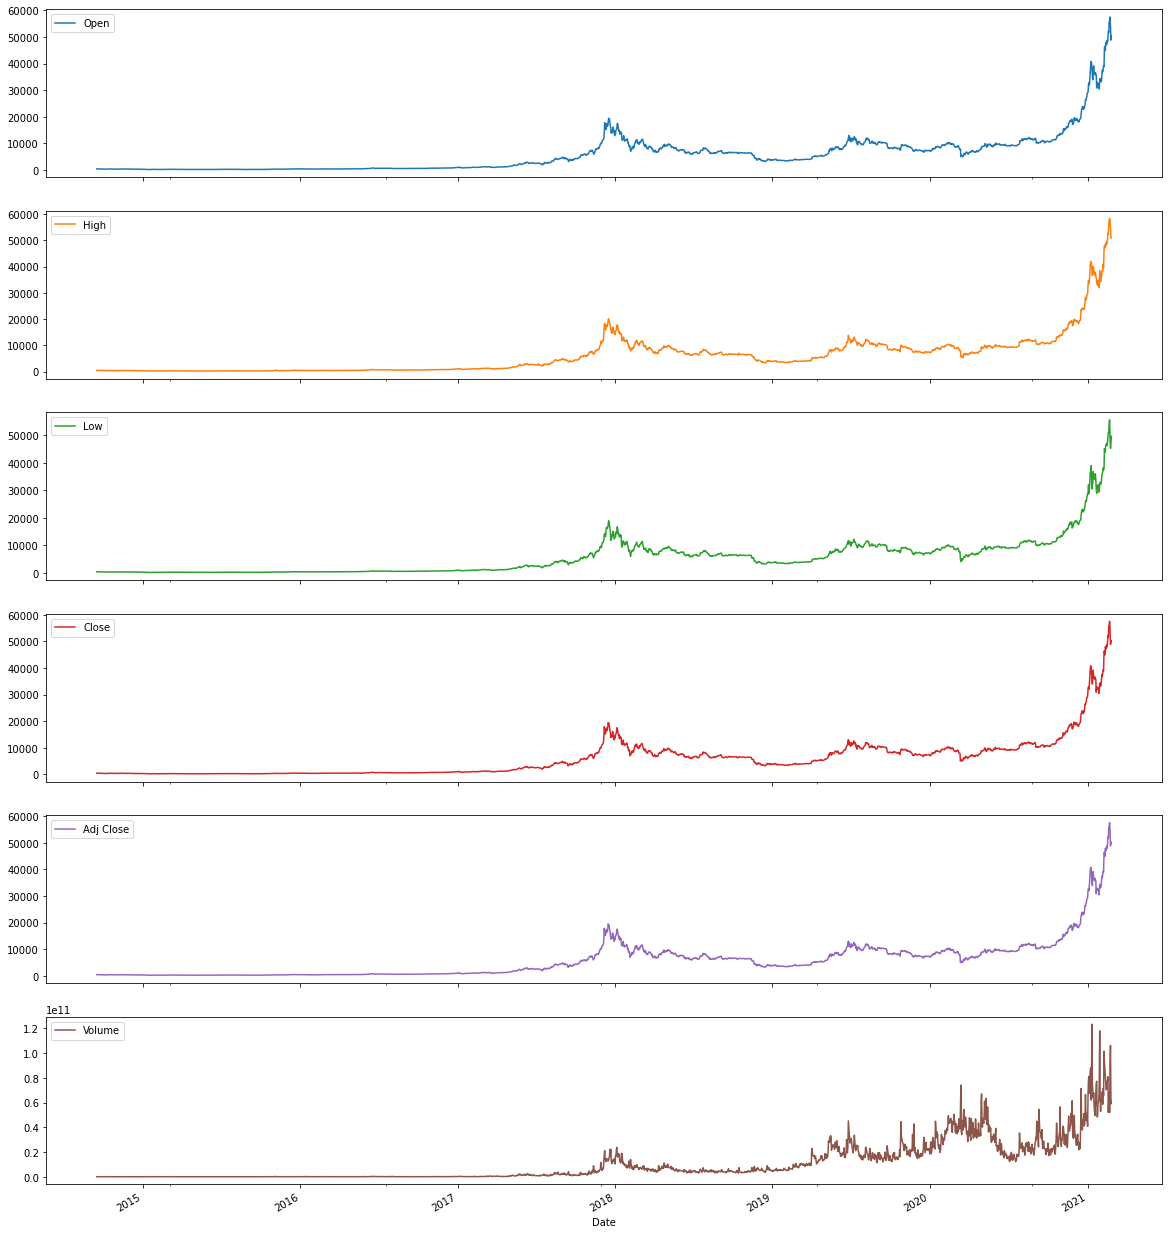

In [136]:
df2.plot(subplots=True, figsize=(20,24))
#plt.savefig('stocks.png')
plt.show()

In [137]:
df2 = df2[df2['Open'].notnull()]

In [138]:
df2.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Dickey Fuller Test

In [158]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
# low p-value: means that we reject the null hypothesis and classify it as stationary.
# high p-value: cannot reject the null hypothesis and classify non-stationary series.

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df2['Volume'])

# Extract and display test results 
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    0.969257
p-value                           0.993931
#Lags Used                       24.000000
Number of Observations Used    2325.000000
Critical Value (1%)              -3.433166
Critical Value (5%)              -2.862784
Critical Value (10%)             -2.567432
dtype: float64


### Decomposition (Original, Trend, Seasonality, Residual)

Text(0.5, 0.98, 'Decomposition: Close')

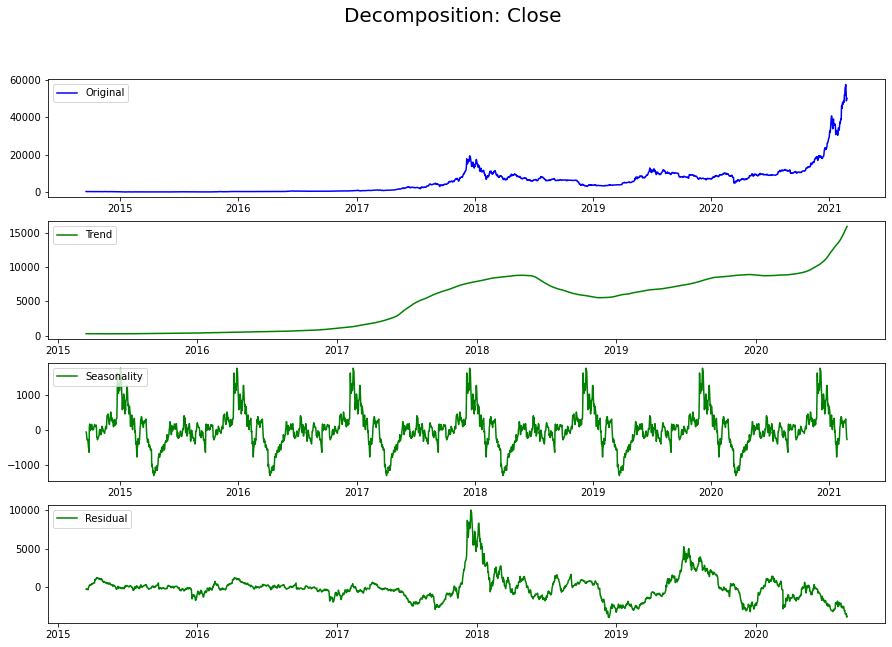

In [144]:
# Plot Decomposition (Original, Trend, Seasonality, Residual)

# Note: You have to have at least twice as many observations in your data as the period that you want to test; i.e. if you want to set the period to 20 then you need at least 40 observations).

decomp = seasonal_decompose(df2[['Close']], period= 360)
est_trend = decomp.trend # Trend is overall direction of the data
est_seasonal = decomp.seasonal # Seasonality is the periodic component
est_residual = decomp.resid  # Residuals are random fluctuations. You can think of them as a noise component.

fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df2['Close'], label='Original', color='b')
axes[0].legend(loc='upper left')

axes[1].plot(est_trend, label='Trend', color='g')
axes[1].legend(loc='upper left')

axes[2].plot(est_seasonal, label='Seasonality',color='g')
axes[2].legend(loc='upper left')

axes[3].plot(est_residual, label='Residual',color='g')
axes[3].legend(loc='upper left')

plt.suptitle('Decomposition: Close', fontsize=20)

Text(0.5, 0.98, 'Decomposition: Volume')

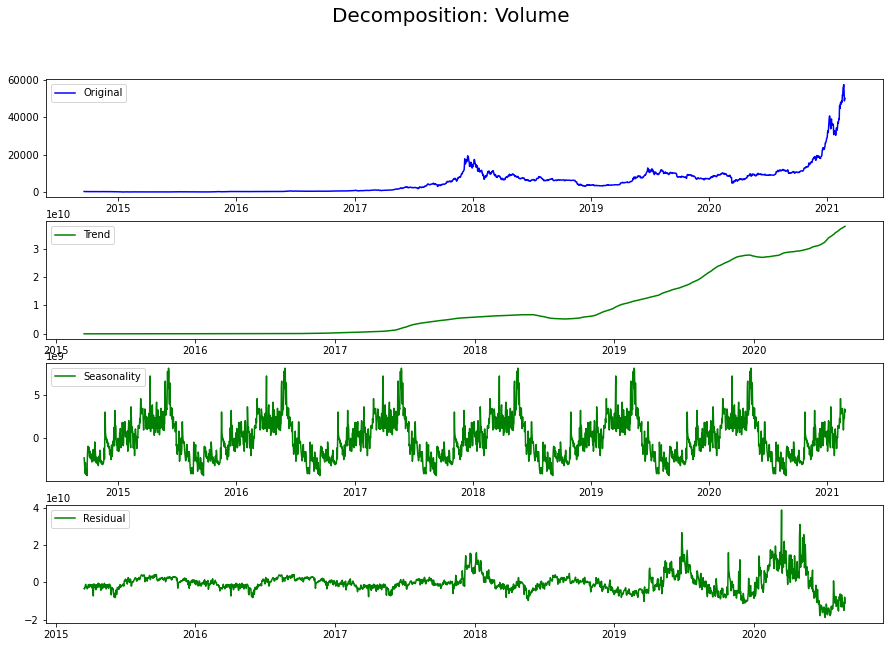

In [145]:
# Plot Decomposition (Original, Trend, Seasonality, Residual)

decomp = seasonal_decompose(df2[['Volume']], period= 360)
est_trend = decomp.trend # Trend is overall direction of the data
est_seasonal = decomp.seasonal # Seasonality is the periodic component
est_residual = decomp.resid # Residuals are random fluctuations. You can think of them as a noise component.

fig, axes = plt.subplots(4, 1)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df2['Close'], label='Original', color='b')
axes[0].legend(loc='upper left')

axes[1].plot(est_trend, label='Trend', color='g')
axes[1].legend(loc='upper left')

axes[2].plot(est_seasonal, label='Seasonality',color='g')
axes[2].legend(loc='upper left')

axes[3].plot(est_residual, label='Residual',color='g')
axes[3].legend(loc='upper left')

plt.suptitle('Decomposition: Volume', fontsize=20)

### Auto-Correlation (ACF)

Text(0.5, 1.0, 'Autocorrelation: Close')

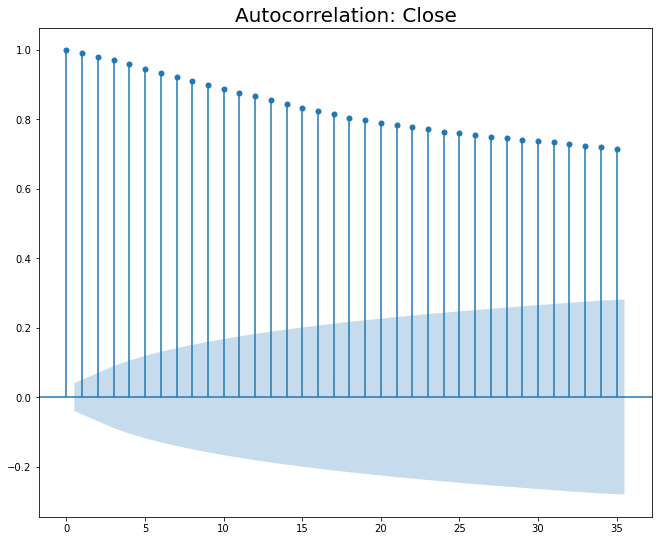

In [152]:
# Plot Auto-Correlation (ACF)
# Autocorrelation is the process of comparing a time series to its past; the more autocorrelated a time series is the easier it will be to predict. 

sm.graphics.tsa.plot_acf(df2['Close'], lags=35)
plt.title('Autocorrelation: Close', fontsize=20)

Text(0.5, 1.0, 'Autocorrelation: Volume')

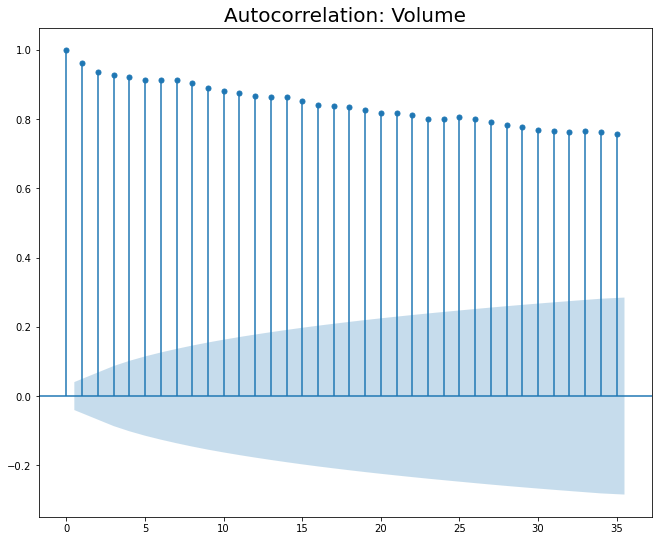

In [141]:
# Plot Auto-Correlation (ACF)

sm.graphics.tsa.plot_acf(df2['Volume'], lags=35)
plt.title('Autocorrelation: Volume', fontsize=20)

### Plot residual stats

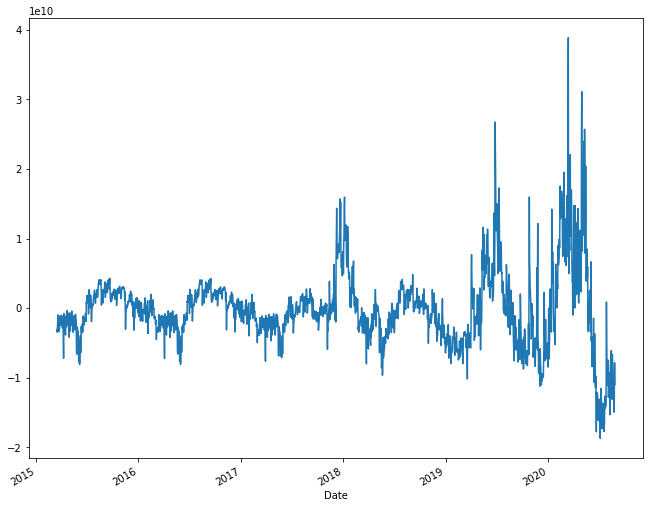

In [148]:
# line plot
est_residual.plot()
plt.show()

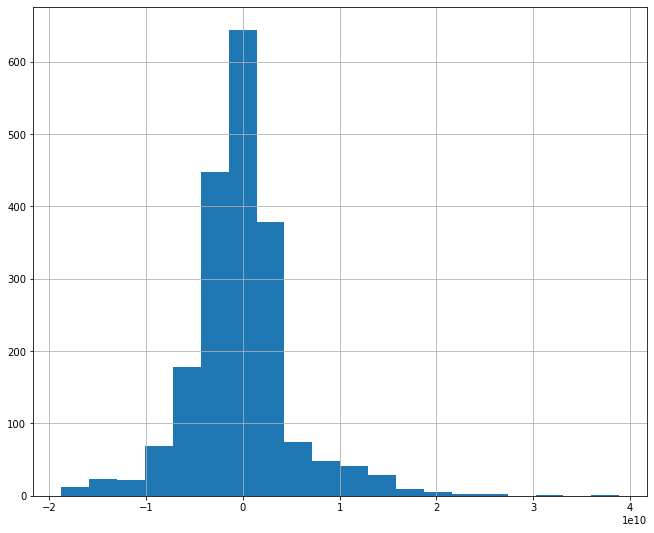

In [157]:
# histogram plot
est_residual.hist(bins=20)
plt.show()